In [35]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,precision_score,recall_score,roc_curve,auc,accuracy_score,f1_score

In [17]:
df = pd.read_csv('penguins.csv')
df.shape

(344, 9)

In [18]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [19]:
df.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [21]:
df.drop('rowid',axis=1,inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [22]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

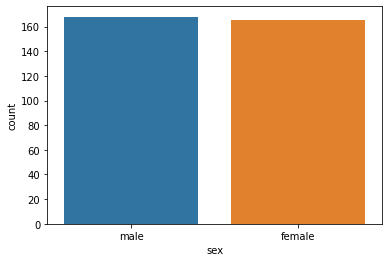

In [23]:
sns.countplot(df.sex)

In [24]:
df.dropna(axis=0,inplace=True)
df.shape

(333, 8)

In [25]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [26]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [27]:
df.island.value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [28]:
df.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [29]:
df.sex.value_counts() 

male      168
female    165
Name: sex, dtype: int64

In [31]:
df.sex = df.sex.apply(lambda x: 1 if x=='male' else 0)

In [38]:
enc = {'Biscoe': 0, 'Dream': 1,'Torgersen':2}
df['island'] = df['island'].map(enc)

enc_sp = {'Adelie': 0, 'Gentoo': 1,'Chinstrap':2}
df['species'] = df['species'].map(enc_sp)

In [39]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,2007
1,0,2,39.5,17.4,186.0,3800.0,0,2007
2,0,2,40.3,18.0,195.0,3250.0,0,2007
4,0,2,36.7,19.3,193.0,3450.0,0,2007
5,0,2,39.3,20.6,190.0,3650.0,1,2007


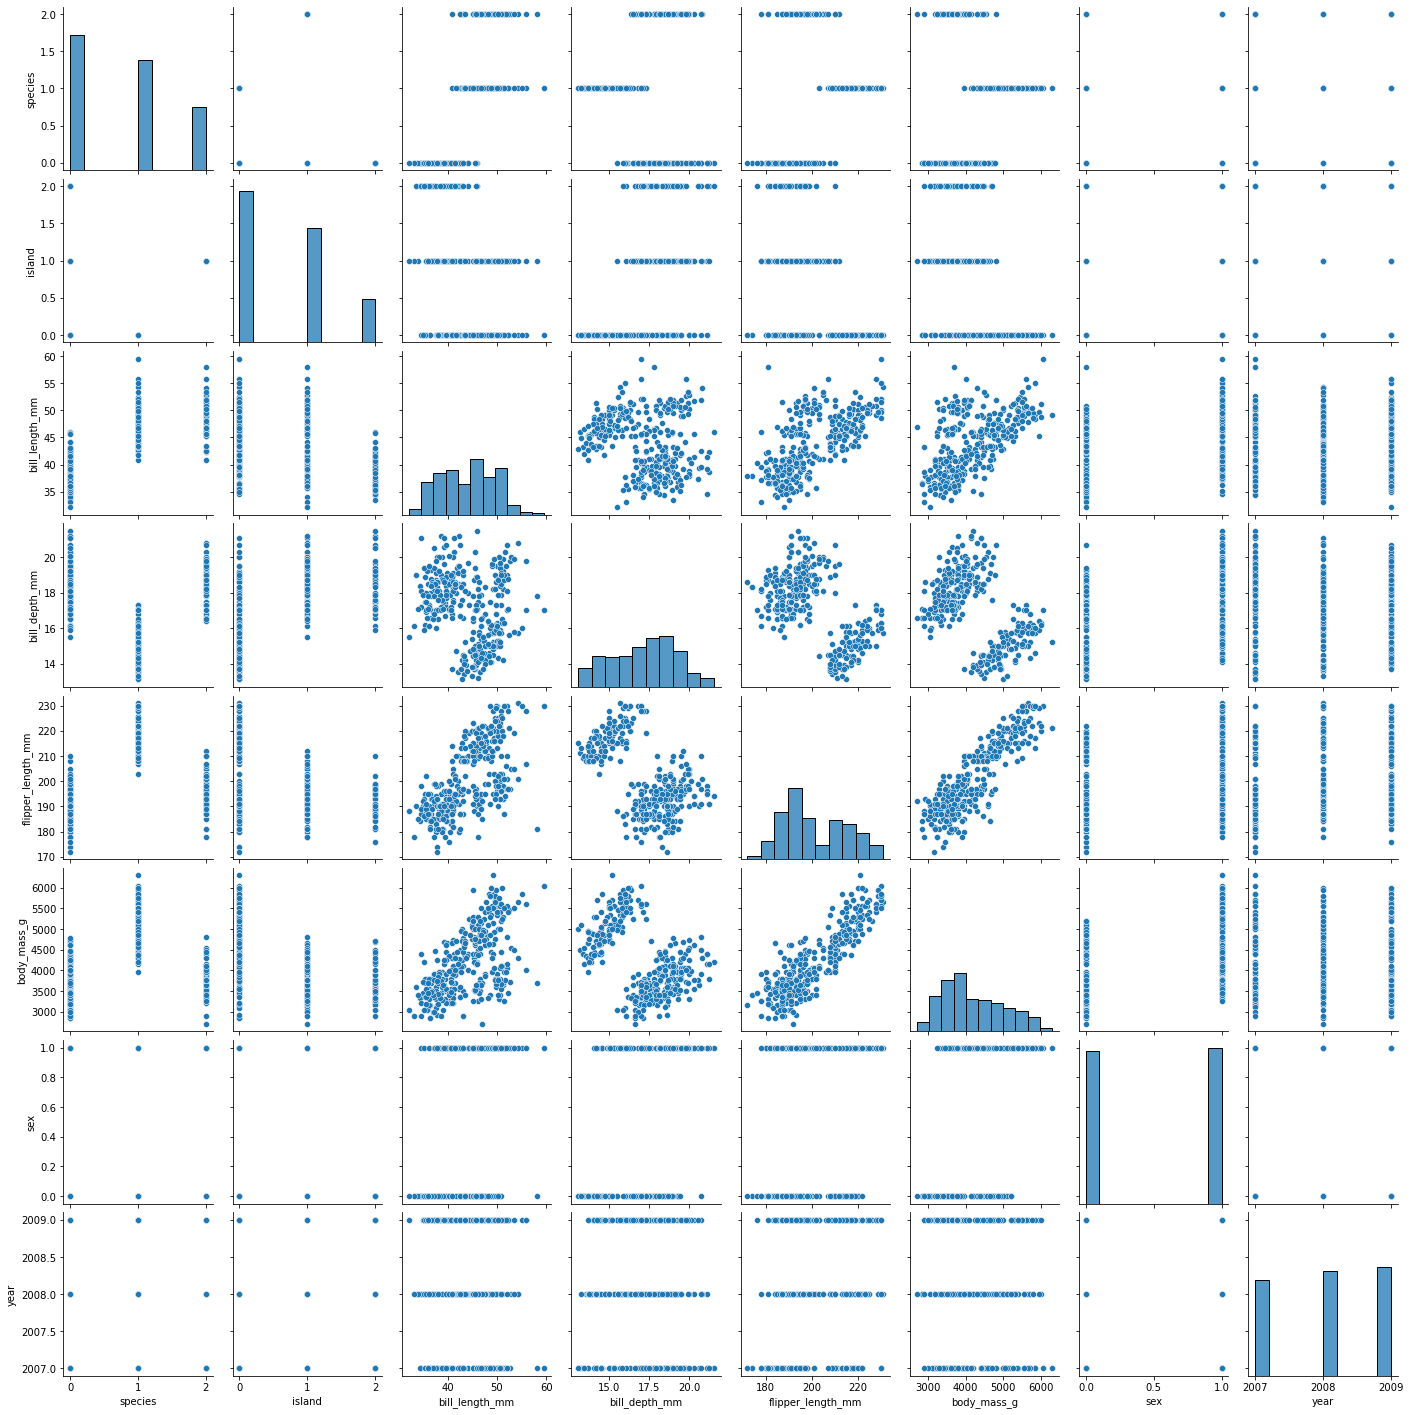

In [40]:
sns.pairplot(df)

In [42]:
X = df.drop(['species'],axis=1)
y = df['species']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((266, 7), (67, 7), (266,), (67,))

### DT ID3 Default

In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_train_pred =dt.predict(X_train)
print(classification_report(y_train,y_train_pred))
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

print('\n\n')


y_test_pred =dt.predict(X_test)
print(classification_report(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        50

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

1.0
[[115   0   0]
 [  0 101   0]
 [  0   0  50]]



              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       1.00      1.00      1.00        18
           2       0.95      1.00      0.97        18

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67

0.9850746268656716
[[30  0  1]
 [ 0 18  0]
 [ 0  0 18]]


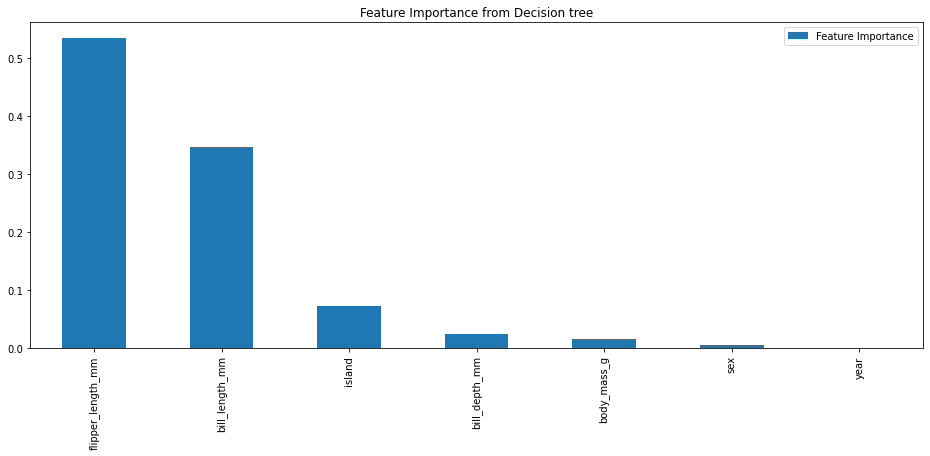

In [45]:
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
plt.title( 'Feature Importance from Decision tree')
feat_importances.nlargest(10).plot(kind='bar',figsize=(16,6))
plt.legend(['Feature Importance'])

- as we have less anount of data to train a tree we should have to try with cross validatation.
- for better result we can combine all dt into bagging claassifier.

<AxesSubplot:>

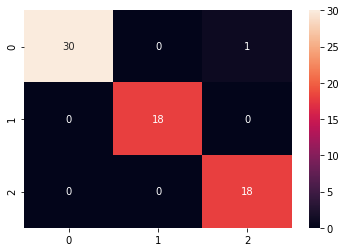

In [52]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)

In [54]:
from sklearn import tree

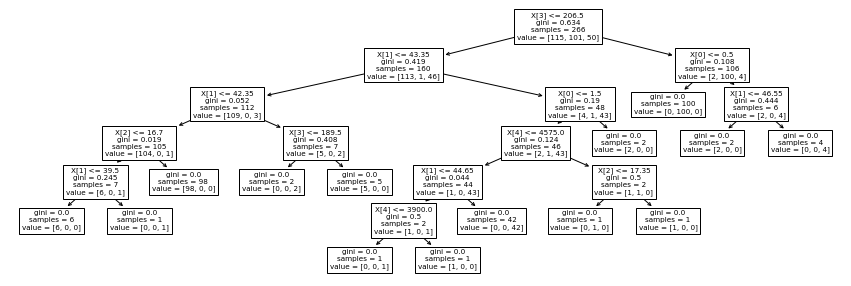

In [55]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))
tree.plot_tree(dt)
plt.show()

In [56]:
from sklearn.model_selection import GridSearchCV

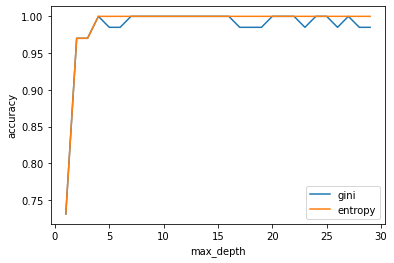

In [60]:
max_depth=[]
acc_gini=[]
acc_entropy=[]
for i in range(1,30):
    dtree=DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(X_train,y_train)
    pred=dtree.predict(X_test)
    
    acc_gini.append(accuracy_score(y_test,pred))
    
    dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtree.fit(X_train,y_train)
    pred=dtree.predict(X_test)
    
    acc_entropy.append(accuracy_score(y_test,pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                   'acc_entropy': pd.Series(acc_entropy),
                   'max_depth': pd.Series(max_depth)})
    
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

- as we can observe that max depth of 5 with entropy gives the same as max deapth of 30 then we will go with max-deapth of 5

In [69]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt.fit(X_train,y_train)

y_train_pred =dt.predict(X_train)
print(classification_report(y_train,y_train_pred))
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

print('\n\n')


y_test_pred =dt.predict(X_test)
print(classification_report(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        50

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

1.0
[[115   0   0]
 [  0 101   0]
 [  0   0  50]]



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

1.0
[[31  0  0]
 [ 0 18  0]
 [ 0  0 18]]


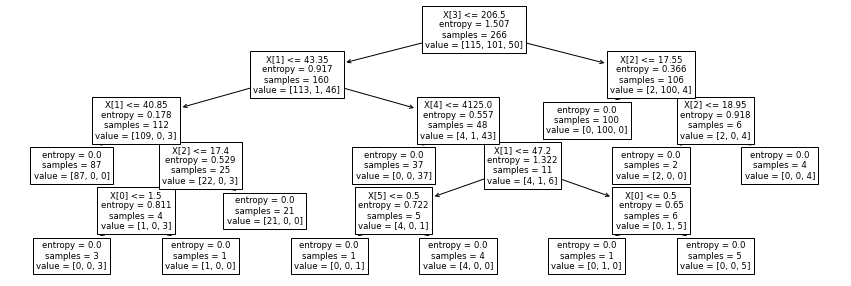

In [70]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))
tree.plot_tree(dt)
plt.show()

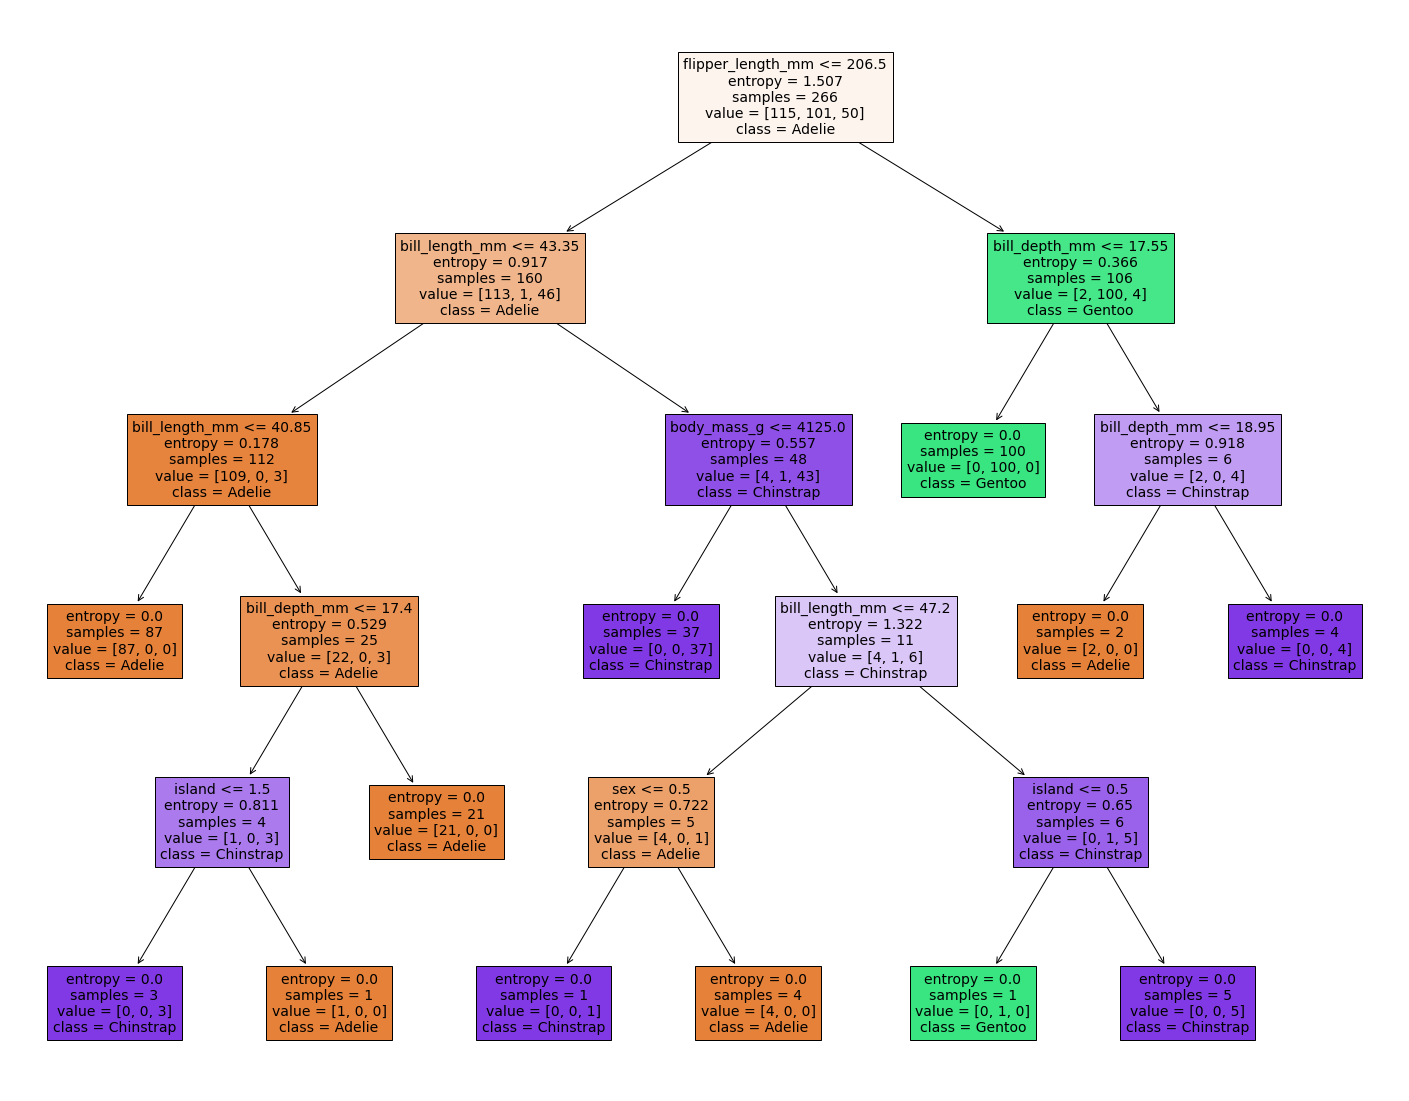

In [94]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['Adelie', "Gentoo",'Chinstrap'],
                   filled=True)